<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Sequence_Processing_With_RNNs_and_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Generate Synthetic Time Series

In [2]:
def generate_series(n_steps):
    time = np.linspace(0, 1, n_steps)
    return np.sin(2 * np.pi * time) + np.random.normal(0, 0.1, n_steps)

n_steps = 50
series = np.array([generate_series(n_steps) for _ in range(1000)])


Siapkan Data

In [3]:
X = series[:, :45]
y = series[:, 45]
X = X[..., np.newaxis]  # reshape to (samples, timesteps, features)

X_train, y_train = X[:800], y[:800]
X_valid, y_valid = X[800:], y[800:]


Simple RNN Model

In [4]:
model_rnn = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model_rnn.compile(loss="mse", optimizer="adam")
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0476 - val_loss: 0.0144
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0127 - val_loss: 0.0112
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0103 - val_loss: 0.0114
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0103 - val_loss: 0.0110
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0096 - val_loss: 0.0117
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0102 - val_loss: 0.0116
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0101 - val_loss: 0.0108
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0101 - val_loss: 0.0110


CNN Model untuk Time Series

In [5]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv1D(32, 5, activation="relu", input_shape=[None, 1]),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(32, 5, activation="relu"),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(1)
])

model_cnn.compile(loss="mse", optimizer="adam")
history_cnn = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0974 - val_loss: 0.0116
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - val_loss: 0.0109
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - val_loss: 0.0109
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0109
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - val_loss: 0.0108
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - val_loss: 0.0111
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0108
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0109
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - val_loss: 0.0108
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - val_loss: 0.0110


Visualisasi Loss

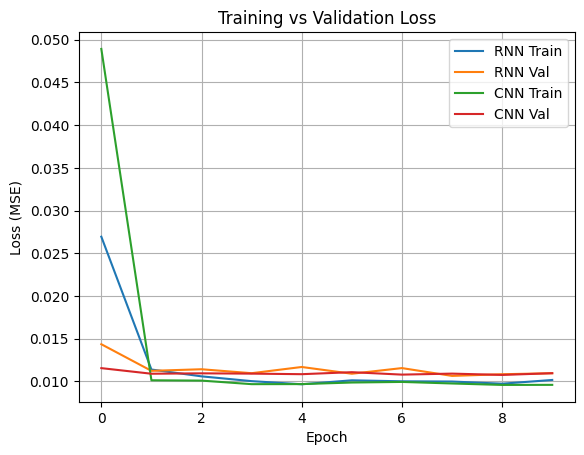

In [6]:
plt.plot(history_rnn.history["loss"], label="RNN Train")
plt.plot(history_rnn.history["val_loss"], label="RNN Val")
plt.plot(history_cnn.history["loss"], label="CNN Train")
plt.plot(history_cnn.history["val_loss"], label="CNN Val")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.grid()
plt.show()
